In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
df = rd.merge(cd, on="city")

# Display the data table for preview
df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

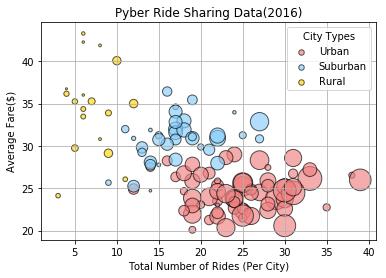

In [24]:
# Obtain the x and y coordinates for each of the three city types
urban = df.loc[df['type'] == "Urban"]
suburban = df.loc[df['type'] == "Suburban"]
rural = df.loc[df['type'] == "Rural"]

urban_rides = urban.groupby("city")["ride_id"].count()
suburban_rides = suburban.groupby("city")["ride_id"].count()
rural_rides = rural.groupby("city")["ride_id"].count()

urban_drivers = urban.groupby("city")["driver_count"].sum()
suburban_drivers = suburban.groupby("city")["driver_count"].sum()
rural_drivers = rural.groupby("city")["driver_count"].sum()

urban_fare = urban.groupby('city')["fare"].mean()
suburban_fare = suburban.groupby('city')["fare"].mean()
rural_fare = rural.groupby('city')["fare"].mean()


# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_drivers*.25, alpha=0.65, label="Urban")
plt.scatter(suburban_rides, suburban_fare, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=suburban_drivers*.5, alpha=0.65, label="Suburban")
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="gold", edgecolors="black",
            s=rural_drivers, alpha=0.65, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Data/Pyber-Ride-Sharing-Data-2016.png")

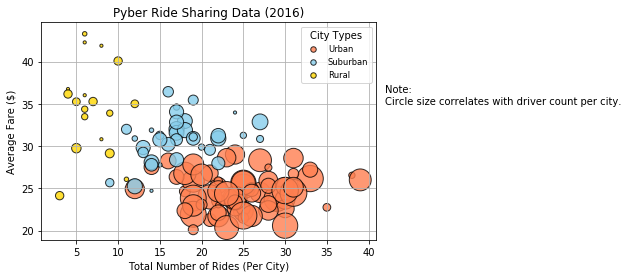

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

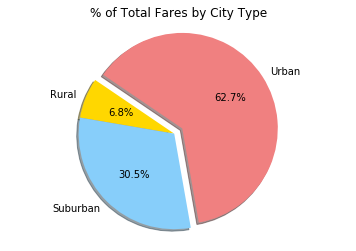

In [57]:
# Calculate Type Percents
urban_fare_total = urban.fare.sum()
suburban_fare_total = suburban.fare.sum()
rural_fare_total = rural.fare.sum()

city_type = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
fares_by_city = np.array([urban_fare_total, rural_fare_total, suburban_fare_total], dtype=float)
explode = (.1,0,0)

# Build Pie Chart
plt.pie(fares_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Total-Fares-City-Type.png")

In [58]:
# Show Figure
plt.show()

## Total Rides by City Type

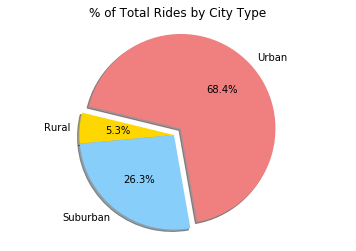

In [59]:
# Calculate Ride Percents
urban_ride_total = urban.ride_id.count()
suburban_ride_total = suburban.ride_id.count()
rural_ride_total = rural.ride_id.count()

rides_by_city = np.array([urban_ride_total, rural_ride_total, suburban_ride_total], dtype=float)
explode = (.1,0,0)
# Build Pie Chart
plt.pie(rides_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Total-Rides-City-Type.png")

In [60]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.1129677897147856,
 1.2064530019897803,
 -1.0785783312319912,
 1.1340349995525867)

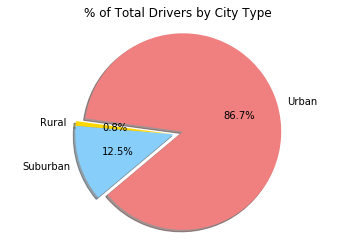

In [61]:
# Calculate Driver Percents
urban_driver_total = urban.driver_count.sum()
suburban_driver_total = suburban.driver_count.sum()
rural_driver_total = rural.driver_count.sum()

driver_by_city = np.array([urban_driver_total, rural_driver_total, suburban_driver_total], dtype=float)
explode = (.1,0,0)
# Build Pie Charts
plt.pie(driver_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
# Save Figure


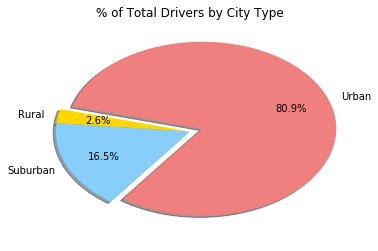

In [6]:
# Show Figure
plt.show()